In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # to change styles
import matplotlib.style as style

#import magic line to show graphs in jupyter notebook
%matplotlib inline

#need to clean episode 0 that is showing up... 

In [2]:
#formating for seaborn
#style.available

In [3]:
style.use('seaborn')

In [4]:
df = pd.read_csv('buffy_angel.csv',index_col = 0)

In [5]:
df.head()

,title,episode of,season,episode,rating,votes,original air date,year,plot,show_code
0,Welcome to the Hellmouth,Buffy the Vampire Slayer,1,1,8.201235,3405,1997-03-10,1997,\n When teen vampire slayer Buffy tries to ...,buffy
1,The Harvest,Buffy the Vampire Slayer,1,2,8.001235,2941,1997-03-10,1997,\n Buffy and her friends encounter a powerf...,buffy
2,Witch,Buffy the Vampire Slayer,1,3,7.801235,2963,1997-03-17,1997,\n Buffy suspects she has a witch on her ha...,buffy
3,Teacher's Pet,Buffy the Vampire Slayer,1,4,7.001235,2858,1997-03-24,1997,\n Buffy's biology teacher is killed by a g...,buffy
4,Never Kill a Boy on the First Date,Buffy the Vampire Slayer,1,5,7.501235,2699,1997-03-31,1997,\n With Buffy preoccupied by her date with ...,buffy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 10 columns):
title                254 non-null object
episode of           254 non-null object
season               254 non-null int64
episode              254 non-null int64
rating               254 non-null float64
votes                254 non-null int64
original air date    254 non-null object
year                 254 non-null int64
plot                 254 non-null object
show_code            254 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 21.8+ KB


In [7]:
# Average Rating by TV Show
df.groupby('episode of')['rating'].mean().sort_values(ascending = False)

#wow, people like Ange better than Buffy... 

episode of
Angel                       8.279416
Buffy the Vampire Slayer    8.114429
Name: rating, dtype: float64

In [8]:
#describe returns a df so can index only the columns desired
df.groupby('episode of')['rating'].describe()[['count','mean','std','min','max']].sort_values(by = 'mean',ascending = False)

,count,mean,std,min,max
episode of,,,,,
Angel,110.0,8.279416,0.728626,6.701235,9.601235
Buffy the Vampire Slayer,144.0,8.114429,0.773806,5.801235,9.801235


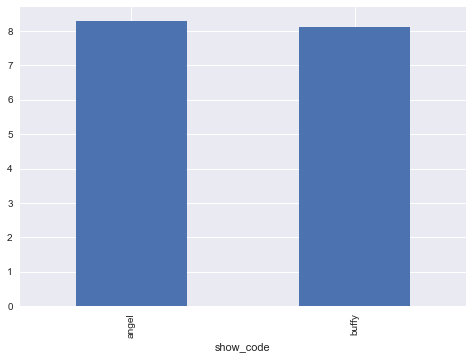

In [9]:
# Average Rating by TV Show
df.groupby('show_code')['rating'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [10]:
#simple stats tutorial 
#https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/

In [11]:
#is atla significantly better than lok?
#what about tdp?

#Null: Ratings betwween atla & lok is the same
#Alternative: Ratings betwween atla & lok are different
#alpha = .05
from scipy.stats import ttest_ind

In [12]:
# returns 2 values, the calculated t-stat and the two wailed p-value
stat, p = ttest_ind(df['rating'][df['show_code']=='buffy'], #data 1
                    df['rating'][df['show_code']=='angel']) #data 2

In [13]:
#atla vs lok
alpha = .05
if p>alpha:
    print(f'The T value was:{stat}. The P value was:{p} Fail to reject null')
else:
    print(f'The T value was:{stat}. P value was:{p} Reject null hypothesis')
    
#still can't tell if they are different

The T value was:-1.7266209569163464. The P value was:0.08546126017338765 Fail to reject null


episode of
Angel                       AxesSubplot(0.125,0.125;0.775x0.755)
Buffy the Vampire Slayer    AxesSubplot(0.125,0.125;0.775x0.755)
Name: rating, dtype: object

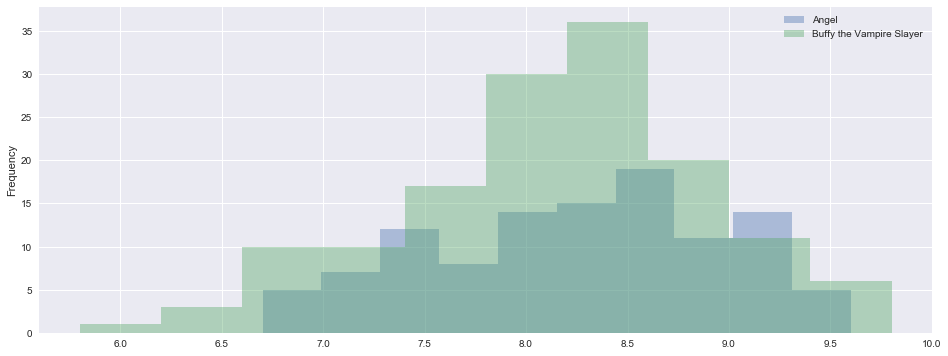

In [30]:
#how does histogram look by show?
plt.figure(figsize = (16,6))
df.groupby('episode of')['rating'].plot(kind = 'hist', alpha = .4, legend = True)

In [17]:
#what are the worst episodes?
df[df['rating']<7.0].sort_values(by = 'rating')

,title,episode of,season,episode,rating,votes,original air date,year,plot,show_code
65,Beer Bad,Buffy the Vampire Slayer,4,5,5.801235,2593,1999-11-02,1999,\n Xander finds employment as a bartender a...,buffy
23,Bad Eggs,Buffy the Vampire Slayer,2,12,6.501235,2474,1998-01-12,1998,\n Buffy and her friends encounter even mor...,buffy
167,Doublemeat Palace,Buffy the Vampire Slayer,6,12,6.501235,1852,2002-01-29,2002,\n When Buffy gets a job at the Doublemeat ...,buffy
173,As You Were,Buffy the Vampire Slayer,6,15,6.501235,1750,2002-02-26,2002,"\n Buffy's old boyfriend, Riley Finn, shows...",buffy
91,Where the Wild Things Are,Buffy the Vampire Slayer,4,18,6.601235,2417,2000-04-25,2000,\n Buffy and Riley's passionate lovemaking ...,buffy
31,Go Fish,Buffy the Vampire Slayer,2,20,6.701235,2489,1998-05-05,1998,\n Members of the Sunnydale swim team are k...,buffy
83,Goodbye Iowa,Buffy the Vampire Slayer,4,14,6.701235,2042,2000-02-15,2000,\n Tension erupts between Buffy and an aili...,buffy
122,Blood Money,Angel,2,12,6.701235,1273,2001-01-23,2001,\n Wolfram and Hart are sponsoring a fund r...,angel
244,Why We Fight,Angel,5,13,6.701235,1290,2004-02-11,2004,\n Angel's past comes to haunt him. An ally...,angel
7,"I, Robot... You, Jane",Buffy the Vampire Slayer,1,8,6.801235,2725,1997-04-28,1997,\n Willow's new Internet chat buddy turns o...,buffy


In [21]:
#how about the best?
df[df['rating']>9.5].sort_values(by = 'rating',ascending = False)

#top 3 rated Buffy episodes are the most unique

#the musical episode
#the opposite of the music episode
#the one where they remove music

,title,episode of,season,episode,rating,votes,original air date,year,plot,show_code
157,"Once More, with Feeling",Buffy the Vampire Slayer,6,7,9.801235,7665,2001-11-06,2001,"\n In this musical extravaganza, Sunnydale ...",buffy
75,Hush,Buffy the Vampire Slayer,4,10,9.701235,5558,1999-12-14,1999,\n When everyone in Sunnydale loses their v...,buffy
131,The Body,Buffy the Vampire Slayer,5,16,9.701235,4853,2001-02-27,2001,"\n Buffy, Dawn, and their friends deal with...",buffy
33,Becoming: Part 2,Buffy the Vampire Slayer,2,22,9.601235,3496,1998-05-19,1998,\n Spike strikes an unlikely alliance with ...,buffy
143,The Gift,Buffy the Vampire Slayer,5,22,9.601235,3468,2001-05-22,2001,\n As Glory prepares Dawn for a bloodlettin...,buffy
253,Not Fade Away,Angel,5,22,9.601235,2603,2004-05-19,2004,"\n In the series finale, Angel reveals that...",angel
243,You're Welcome,Angel,5,12,9.501235,2046,2004-02-04,2004,\n Cordelia awakens from her magically indu...,angel
245,Smile Time,Angel,5,14,9.501235,2064,2004-02-18,2004,\n Angel and the gang set out to foil an ev...,angel


In [29]:
df.iloc[131]['plot']

"\n    Buffy, Dawn, and their friends deal with the aftermath of Joyce's death.    "

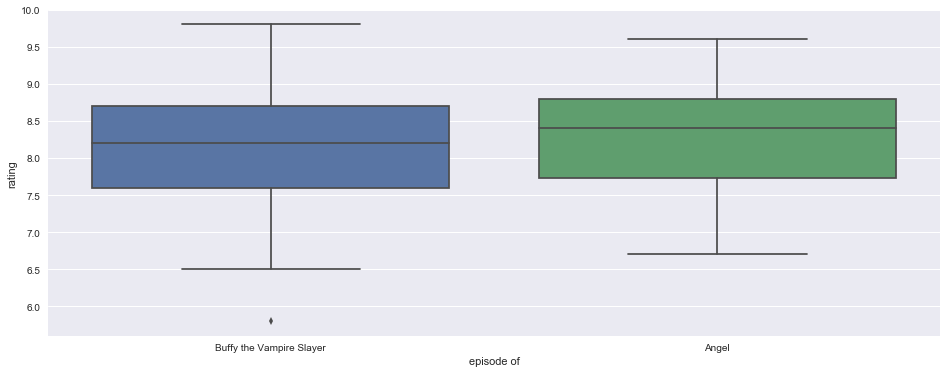

In [32]:
plt.figure(figsize = (16,6))
sns.boxplot(x ='episode of',y='rating',data = df)

#Buffy's low is way lower than Angel's

In [34]:
df2 = df[['show_code','season','episode','rating']].pivot_table(index = ['show_code','season','episode']).copy()

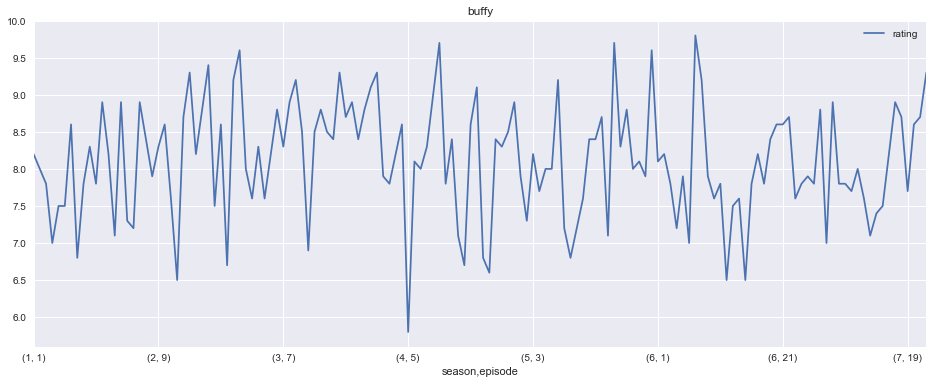

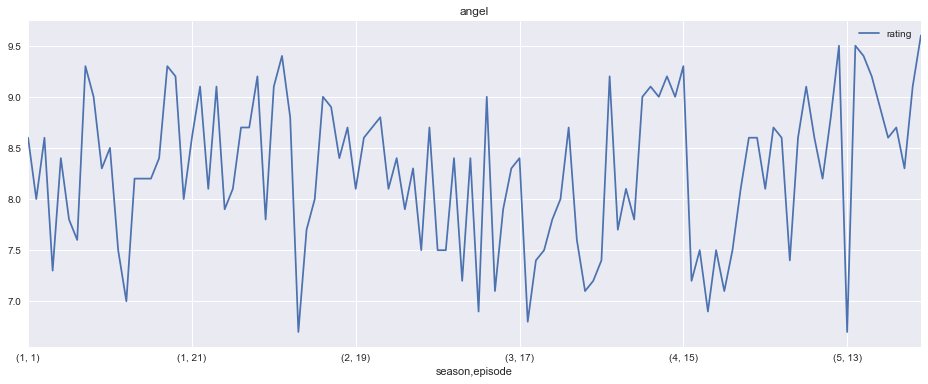

In [35]:
# I did it! Wonder how it woudl look relative to creating a new column with s1-ep1 
# need to make this a bigger and wider... 
#plt.figure(figsize = (16,6))
df2.loc['buffy'].plot(figsize = (16,6), title = 'buffy')
df2.loc['angel'].plot(figsize = (16,6), title = 'angel')

#Show observations 

#honestly, this is too much data to digest -- hard to draw meaningful conclusions from this

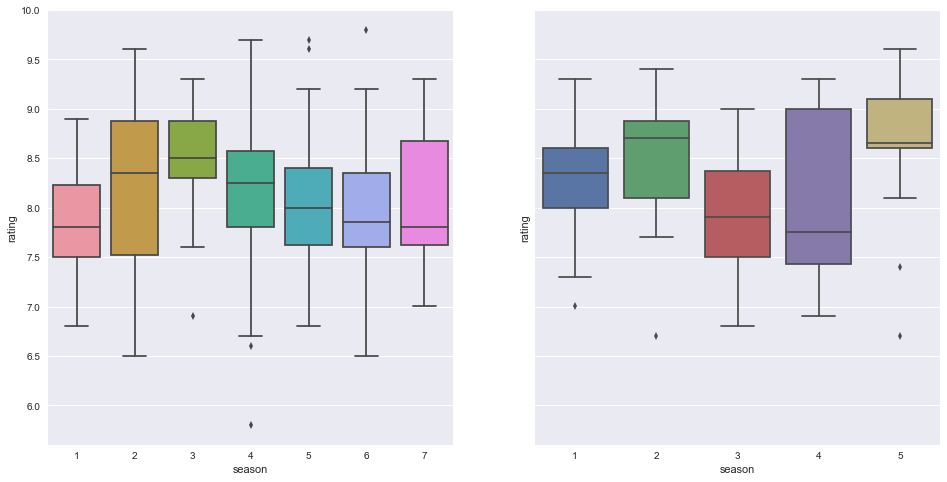

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8), sharey = True)

sns.boxplot(x ='season',y='rating',data = df[df['show_code']== 'buffy'],ax=ax1)
sns.boxplot(x ='season',y='rating',data = df[df['show_code']== 'angel'],ax=ax2)

#interesting stuff

#buffy season 2 has the widest varation, super up and down
#buffy season 3 has the highest overall performance - which I would agree with, like it better when still in high scool

#Musical episode was a diamong in the rough for season 6
#season 4 had two of the worst episodes Beer Bad and "where the wild things are"

#wide variation in Angel season 4
#super strong Angel season 5, averaged above a 8.5